b) grafica cantidad comprada por cada cliente

##CLIENTES.csv:

de esta tabla obtenemos los id de cada cliente y todas las facturas diferentes de los productos que compraron para asi poder tener una sumatoria de facturas totales con todas sus cantidades respectivas por cliente.

In [1]:
import pandas as pd
pd.read_csv("CLIENTES.csv")

,ID_Cliente,ID_FACTURA
0,0,13359
1,0,4690
2,0,6498
3,0,24517
4,0,9937
...,...,...
21570,39,12463
21571,39,7923
21572,39,6982
21573,39,3168


##FACTURA.csv:

de esta tabla podemos obtener la cantidad total por cada id de factura sumando en cada id de factura repetido sus cantidades para asi tener una cantidad total por id de factura y asociala a la tabla de "CLIENTES.csv"

In [2]:
import pandas as pd
pd.read_csv("FACTURA.csv")

,ID_Factura,Producto,Cantidad
0,10440,escaper,125
1,10440,lamina plastica,65
2,10440,escaper,145
3,10440,miniglide,142
4,10440,LCD 30hz pb23,56
...,...,...,...
131377,22157,earecho,42
131378,22157,LCD 60hz pldas,89
131379,22157,miniglide,107
131380,22157,Vidrio templado,82


##GRAFICA:

para la grafica primero se calcularon las cantidades totales por cada id de factura de "FACTURA.csv", para luego asociarlas en "CLIENTES.csv", de esta forma hacer una sumatoria de sumatorias, tuvo que asociarse dos titulos de columna simultaneamente pues en la primera tabla el titulo de la columna era "ID_Factura" mientras en la otra tabla era "ID_FACTURA", para que se pudieran reconocer y relacionar los datos de ambas columnas sin problemas, luego se muestra en una grafica de lineas en el eje "x" el id del cliente y en el eje "y" la cantidad total comprada por dicho cliente.

Cliente con la menor cantidad comprada:
ID_Cliente: 37, Cantidad: 246921

Cliente con la mayor cantidad comprada:
ID_Cliente: 31, Cantidad: 290715


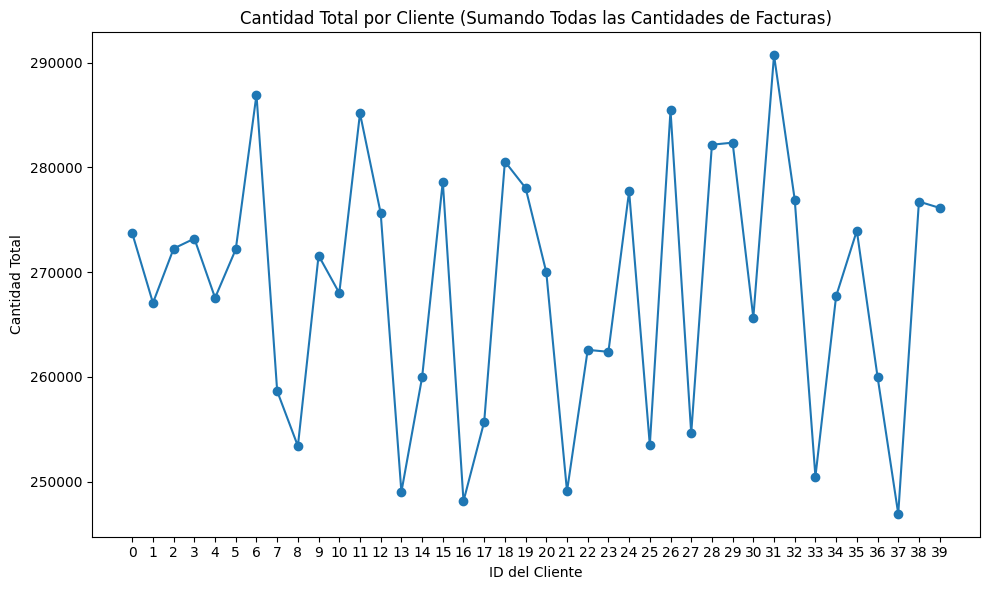

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

#Cargar los datos de los archivos CSV
clientes_df = pd.read_csv('CLIENTES.csv')
factura_df = pd.read_csv('FACTURA.csv')

#Sumar cantidades por ID_Factura en FACTURA.csv
cantidad_total_por_factura = factura_df.groupby('ID_Factura')['Cantidad'].sum().reset_index()

#Combinar las columnas en base a ID_Factura
merged_df = pd.merge(clientes_df, cantidad_total_por_factura, left_on='ID_FACTURA', right_on='ID_Factura', how='left')

#Calcular la cantidad total por cliente sumando cantidades de todas las facturas
cantidad_total_por_cliente = merged_df.groupby('ID_Cliente')['Cantidad'].sum().reset_index()

#Encontrar el cliente con la menor cantidad
cliente_menor_cantidad = cantidad_total_por_cliente.loc[cantidad_total_por_cliente['Cantidad'].idxmin()]

#Encontrar el cliente con la mayor cantidad
cliente_mayor_cantidad = cantidad_total_por_cliente.loc[cantidad_total_por_cliente['Cantidad'].idxmax()]


print("Cliente con la menor cantidad comprada:")
print(f"ID_Cliente: {int(cliente_menor_cantidad['ID_Cliente'])}, Cantidad: {int(cliente_menor_cantidad['Cantidad'])}")

print("\nCliente con la mayor cantidad comprada:")
print(f"ID_Cliente: {int(cliente_mayor_cantidad['ID_Cliente'])}, Cantidad: {int(cliente_mayor_cantidad['Cantidad'])}")

#gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(cantidad_total_por_cliente['ID_Cliente'], cantidad_total_por_cliente['Cantidad'], marker='o', linestyle='-')
plt.xlabel('ID del Cliente')
plt.ylabel('Cantidad Total')
plt.title('Cantidad Total por Cliente (Sumando Todas las Cantidades de Facturas)')


plt.xticks(cantidad_total_por_cliente['ID_Cliente'])


plt.tight_layout()
plt.show()

##OBSERVACIONES:

el id del cliente con la menor cantidad comprada fue el 37 con 246921 unidades, mientras el id del cliente con la mayor cantidad comprada fue el 31 con 290715, cabe resaltar que estos clientes como se mencionaba son empresas o negocios que compran al por mayor, por lo cual la cantidad comprada es tan alta por cada id de cliente pues son realmente empresas.